In [1]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style('darkgrid')

In [5]:
## iris dataset

data = pd.read_csv('/content/iris_data.csv')

In [6]:
data.head()

,Column1,Column2,Column3,Column4,Column5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.columns

Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5'], dtype='object')

In [14]:
data.rename(columns={'Column1':'Sepal_length', 'Column2':'Sepal_width', 'Column3':'Petal_length', 'Column4':'Petal_width', 'Column5':'Species'},inplace=True)

In [15]:
data.shape

(151, 5)

In [16]:
## count the species present in species column

data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

Text(0.5, 0, 'Sepal_length')

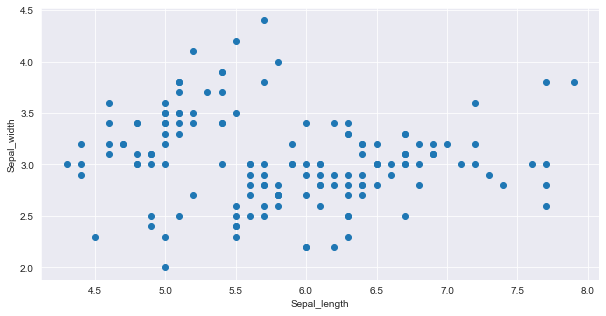

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(data['Sepal_length'], data['Sepal_width'])
plt.ylabel('Sepal_width')
plt.xlabel('Sepal_length')

Text(0.5, 0, 'Pepal_length')

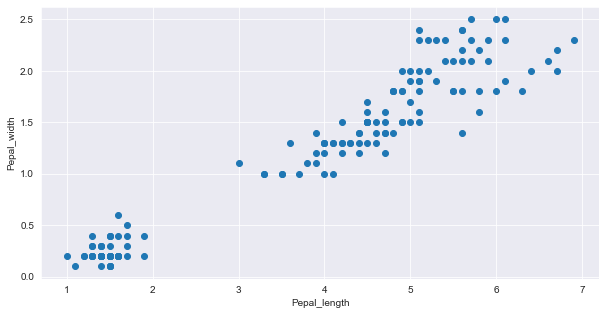

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(data['Petal_length'], data['Petal_width'], marker='o')
plt.ylabel('Pepal_width')
plt.xlabel('Pepal_length')

In [25]:
## checking the null values 
data.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64

In [24]:
data.dropna(inplace=True)

In [26]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
## converting species into label encoding

def map_species(f):
    if f == 'setosa':
        f = 0
    elif f == 'versicolor':
        f = 1
    elif f == 'virginica':
        f = 2
    return f

In [30]:
data['Species'] = data.Species.map(map_species)

In [31]:
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

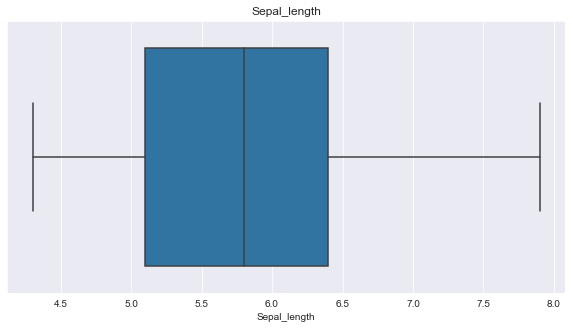

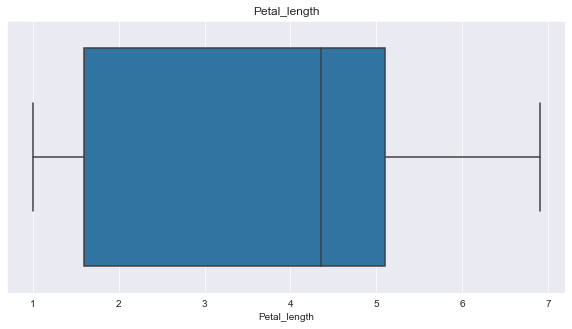

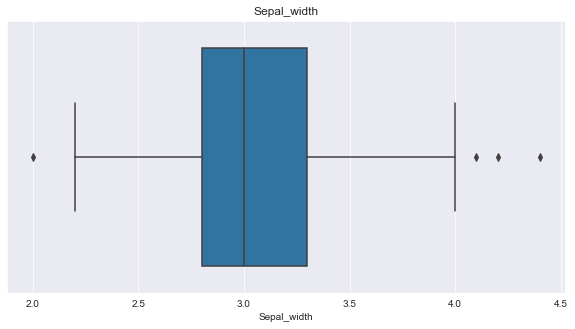

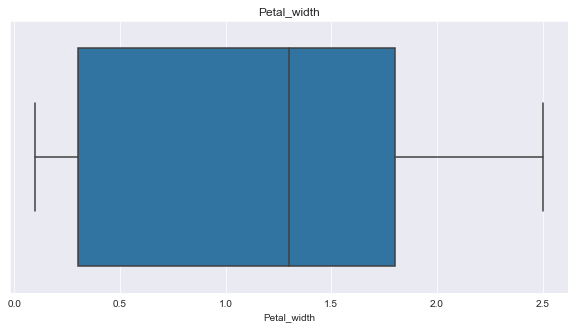

In [32]:
for f in ['Sepal_length', 'Petal_length', 'Sepal_width', 'Petal_width']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[f])
    plt.title(f)

In [33]:
## independent and dependent features

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [34]:
## preprocessing

sc = StandardScaler()
X = sc.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [37]:
lg = LogisticRegression()

In [38]:
lg.fit(X_train, y_train)

LogisticRegression()

In [39]:
pred = lg.predict(X_test)

--------------------------------------------Classification Report---------------------------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

------------------------------------------Accuracy Score---------------------------------------------------------
1.0
--------------------------------------------Confustion Matrix-----------------------------------------------------


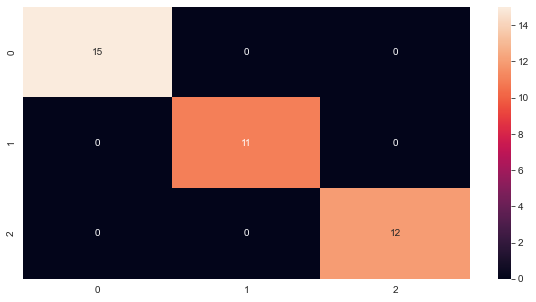

In [40]:
print("--------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))

print("------------------------------------------Accuracy Score---------------------------------------------------------")
print(accuracy_score(y_test, pred))

print("--------------------------------------------Confustion Matrix-----------------------------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True);

In [41]:
pd.DataFrame({'Actual': y_test,  'Predicted': pred}).head(50)

,Actual,Predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor
